# Vertical transmission: sensitivity analysis

In [1]:
from SALib.sample import saltelli, fast_sampler
import pandas as pd
from Sensitivity import Sensitivity
import joblib

model_path = "../models/BMI-SNP/"
output_path = "../output/data/"
plots_path = "../output/plots/"

In [3]:
# parameter dictionary
problem = {
    'num_vars': 3,
    'names': ['random-mating', 'leakage', 'fertility-differential'],
    'bounds': [[0, 1.0],
               [0, 0.50],
               [0, 0.30]]
}

# EFast

In [3]:
sample_parameters = False
if (sample_parameters):
    param_values = fast_sampler.sample(problem, 2000)
    t = pd.DataFrame(param_values)
    t.columns = ['random-mating', 'leakage', 'fertility-differential']
    t.to_csv(model_path + "data/param-vt-efast.csv", index=False)
else:
    t = pd.read_csv(model_path + "data/param-vt-efast.csv")
t.shape

(6000, 3)

In [4]:
# process results
df = pd.read_csv(output_path + "results-vt-efast.csv", sep = ";")
cols = df.bmi_category_prop.str.replace(r'\[|\]', '').str.split(",", n=4, expand=True)
colnames = ['g'+str(i+1) for i in range(4)]
cols.columns = colnames
cols = cols[colnames].apply(pd.to_numeric)
df = pd.concat([df, cols], axis=1, ignore_index=False)
params = pd.read_csv(output_path + "param-vt-efast.csv", sep = ";")
df = df.merge(params, on = ["iteration", "replicate"])
df = df.sort_values(by=['iteration'])
df = df.loc[df["iteration"] <= len(t),:]

# select parameters
vars = ['p_fertility_factor', 'p_random_mating', 'p_leakage']
X = df.loc[:,vars]

<ipython-input-4-c0a68832a82b>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  cols = df.bmi_category_prop.str.replace(r'\[|\]', '').str.split(",", n=4, expand=True)


## Obesity

                              S1        ST   S1_conf   ST_conf
random-mating           0.022033  0.341896  0.003952  0.018808
leakage                 0.464245  0.887091  0.004483  0.018450
fertility-differential  0.047965  0.441132  0.004174  0.016658


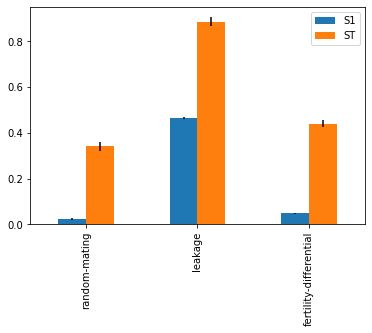

In [5]:
ef = Sensitivity(problem, df['g4'], X)
ef.score('efast')
ef.plot(save=True, filepath= plots_path + 'vt-efast-prop-obese.pdf',
    move=True, moving_path= '../manuscript/plots/')
ef.plot3D(labels={'outcome':'obese', 'y':'random mating', 'x':'fertility', 'z':'leakage'})

sav = {
    'ef_obese_s1': ef.tabval('S1'),
    'ef_obese_st': ef.tabval('ST')
}

## BMI

                              S1        ST   S1_conf   ST_conf
random-mating           0.033189  0.272037  0.004136  0.019151
leakage                 0.533368  0.830951  0.003892  0.018351
fertility-differential  0.105773  0.378694  0.004100  0.019955


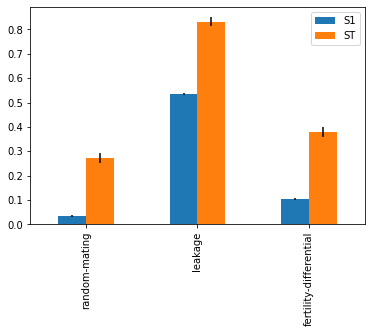

In [6]:
ef = Sensitivity(problem, df['average_bmi'], X)
ef.score('efast')
ef.plot(save=True, filepath= plots_path + 'vt-efast-average-bmi.pdf',
    move=True, moving_path= '../manuscript/plots/')
ef.plot3D(labels={'outcome':'average bmi', 'y':'random mating', 'x':'fertility', 'z':'leakage'})

sav['ef_average_s1'] = ef.tabval('S1')
sav['ef_average_st'] = ef.tabval('ST')


## SD BMI

                              S1        ST   S1_conf   ST_conf
random-mating           0.002972  0.357627  0.003813  0.020175
leakage                 0.395715  0.841936  0.003791  0.018754
fertility-differential  0.096874  0.519739  0.004023  0.018142


['efast-vt.pkl']

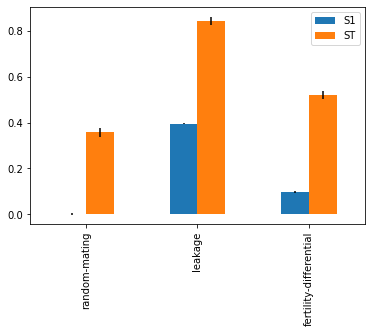

In [7]:
ef = Sensitivity(problem, df['sd_bmi'], X)
ef.score('efast')
ef.plot(save=True, filepath= plots_path + 'vt-efast-sd-bmi.pdf',
    move=True, moving_path= '../manuscript/plots/')
ef.plot3D(labels={'outcome':'sd bmi', 'y':'random mating', 'x':'vertical transmission', 'z':'leakage'})

sav['ef_sd_s1'] = ef.tabval('S1')
sav['ef_sd_st'] = ef.tabval('ST')
sav['names'] = ef.Sif['names']

# save output
v = ef.createRows(sav)
joblib.dump(v, 'efast-vt.pkl')

# Sobol

In [1]:
sample_parameters = False
if (sample_parameters):
    param_values = saltelli.sample(problem, 2**11)
    t = pd.DataFrame(param_values)
    t.columns = ['random-mating', 'genetic-variance', 'vertical-trans']
    t.to_csv(model_path + "data/param-vt-sobol.csv", index=False)
else:
    t = pd.read_csv(model_path + "data/param-vt-sobol.csv")
len(t)

NameError: name 'pd' is not defined

In [ ]:
# read data
df = pd.read_csv(output_path + "results-snp-vt-sobol.csv", sep = ";")
print(df.shape)
cols = df.bmi_category_prop.str.replace(r'\[|\]', '').str.split(",", n=4, expand=True)
colnames = ['g'+str(i+1) for i in range(4)]
cols.columns = colnames
cols = cols[colnames].apply(pd.to_numeric)
df = pd.concat([df, cols], axis=1, ignore_index=False)
params = pd.read_csv(output_path + "param-snp-vt-sobol.csv", sep = ";")
df = df.merge(params, on = ["iteration", "replicate"])
df["iteration"] = pd.to_numeric(df["iteration"])
df = df.sort_values(by=['iteration'])
df = df.loc[df["iteration"] <= len(t),:]

# select parameters
vars = ['p_vertical_trans_variance', 'p_random_mating', 'p_genetic_variance']
X = df.loc[:,vars]

(16384, 12)


/var/folders/36/wsfqn0_j2ng6r0b58wc559fc0000gn/T/ipykernel_13007/3320049218.py:4: FutureWarning:

The default value of regex will change from True to False in a future version.



In [ ]:
params.head()

iteration  replicate  init_pop fertility_type mating_type  \
0          1          1      8000       additive    logistic   
1         10          1      8000       additive    logistic   
2        100          1      8000       additive    logistic   
3       1000          1      8000       additive    logistic   
4      10000          1      8000       additive    logistic   

   p_genetic_variance  p_vertical_trans_variance  p_leakage  p_random_mating  \
0            0.156860                   0.367065        0.1         0.000732   
1            0.406860                   0.117065        0.1         0.246826   
2            0.188110                   0.399048        0.1         0.313232   
3            0.210571                   0.332642        0.1         0.864014   
4            0.114136                   0.420776        0.1         0.158447   

   p_fertility_factor  
0                0.25  
1                0.25  
2                0.25  
3                0.25  
4                0.25

## Proportion obese

                               ST   ST_conf
random-mating            0.211875  0.018421
genetic-variance         0.709980  0.036545
vertical-trans-variance  0.146427  0.011887
                               S1   S1_conf
random-mating            0.169671  0.027675
genetic-variance         0.654178  0.043903
vertical-trans-variance  0.114634  0.023397
                                                   S2   S2_conf
(random-mating, genetic-variance)            0.027610  0.039390
(random-mating, vertical-trans-variance)     0.005509  0.035183
(genetic-variance, vertical-trans-variance)  0.020163  0.053627


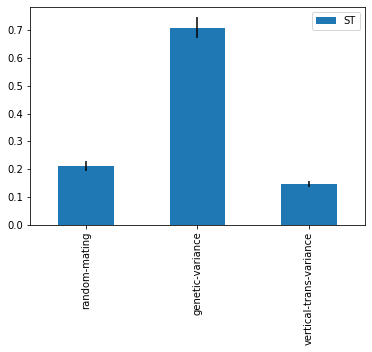

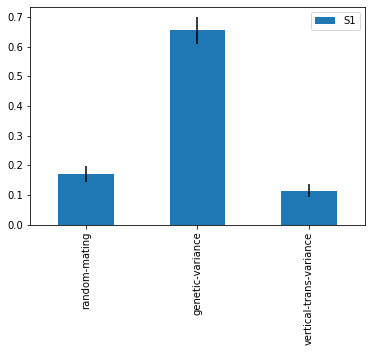

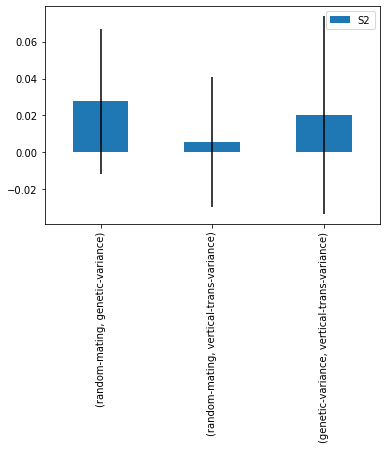

In [ ]:
sb = Sensitivity(problem, df['g4'], X)
sb.score('sobol')
sb.plot(save=True, filepath= plots_path + 'snp-vt-sobol-prop-obese.pdf',
    move=True, moving_path= '../manuscript/plots/')
sb.plot3D(labels={'outcome':'obese', 'y':'random mating', 'x':'vertical transmission', 'z':'genes'})
sav = {
    'sb_obese_s1': sb.tabval('S1'),
    'sb_obese_s2': sb.tabval('S2'),
    'sb_obese_st': sb.tabval('ST')
}

## Average BMI

                               ST   ST_conf
random-mating            0.212704  0.014584
genetic-variance         0.710257  0.039509
vertical-trans-variance  0.127493  0.009547
                               S1   S1_conf
random-mating            0.178481  0.025356
genetic-variance         0.668101  0.046372
vertical-trans-variance  0.107497  0.022363
                                                   S2   S2_conf
(random-mating, genetic-variance)            0.024957  0.036700
(random-mating, vertical-trans-variance)     0.006131  0.037432
(genetic-variance, vertical-trans-variance)  0.011899  0.055447


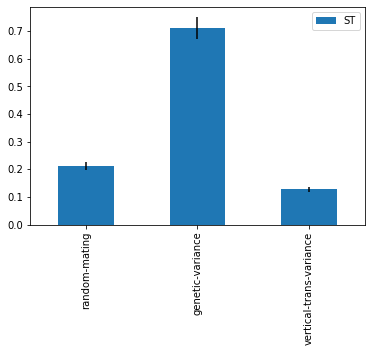

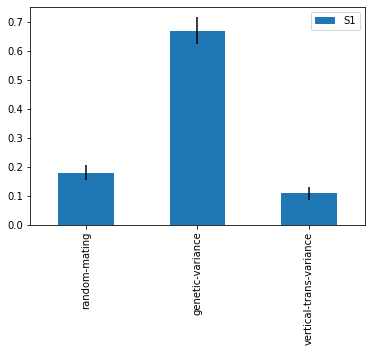

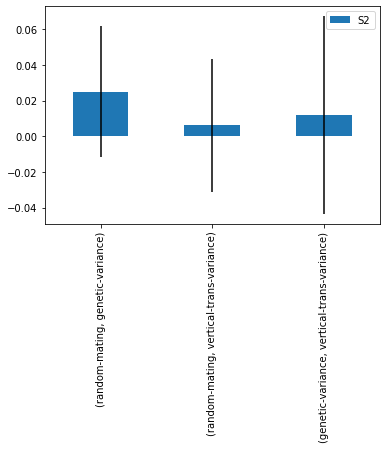

In [ ]:
sb = Sensitivity(problem, df['average_bmi'], X)
sb.score('sobol')
sb.plot(save=True, filepath= plots_path + 'snp-vt-sobol-average-bmi.pdf',
    move=True, moving_path= '../manuscript/plots/')
sb.plot3D(labels={'outcome':'avearge bmi', 'y':'random mating', 'x':'vertical transmission', 'z':'genes'})

sav['sb_average_s1'] =  sb.tabval('S1')
sav['sb_average_s2'] =  sb.tabval('S2')
sav['sb_average_st'] =  sb.tabval('ST')

## BMI SD

                               ST   ST_conf
random-mating            0.478295  0.050714
genetic-variance         0.500777  0.042742
vertical-trans-variance  0.614239  0.049618
                               S1   S1_conf
random-mating            0.149402  0.040026
genetic-variance         0.112649  0.040361
vertical-trans-variance  0.239524  0.050495
                                                   S2   S2_conf
(random-mating, genetic-variance)            0.087534  0.061270
(random-mating, vertical-trans-variance)     0.107392  0.060921
(genetic-variance, vertical-trans-variance)  0.161767  0.065342


['sobol-snp.pkl']

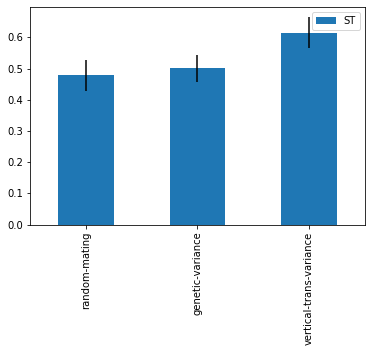

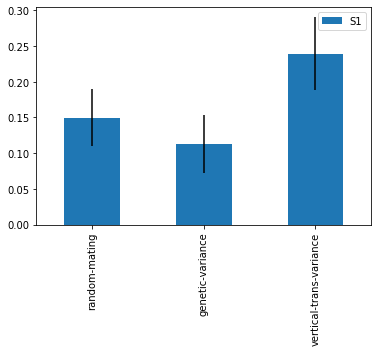

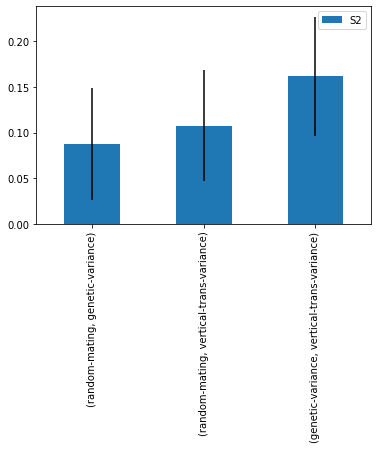

In [ ]:
sb = Sensitivity(problem, df['sd_bmi'], X)
sb.score('sobol')
sb.plot(save=True, filepath= plots_path + 'snp-sobol-sd-bmi.pdf',
    move=True, moving_path= '../manuscript/plots/')
sb.plot3D(labels={'outcome':'sd bmi', 'y':'random mating', 'x':'vertical transmission', 'z':'genes'})

sav['sb_sd_s1'] =  sb.tabval('S1')
sav['sb_sd_s2'] =  sb.tabval('S2')
sav['sb_sd_st'] =  sb.tabval('ST')


# save output
v = sb.createRows(sav, g = ['s1', 's2', 'st'])
joblib.dump(v, 'sobol-snp.pkl')
